**Description**: Analyze accuracies for $m = 100, n = 500$.

**Estimated runtime**: ~1 hour. (Multi-core isn't working on my machine. Set `cores=4`
in the `model.fit` call if it works for you.)

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 100
num_test: Literal[50, 100, 200, 500] = 500

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

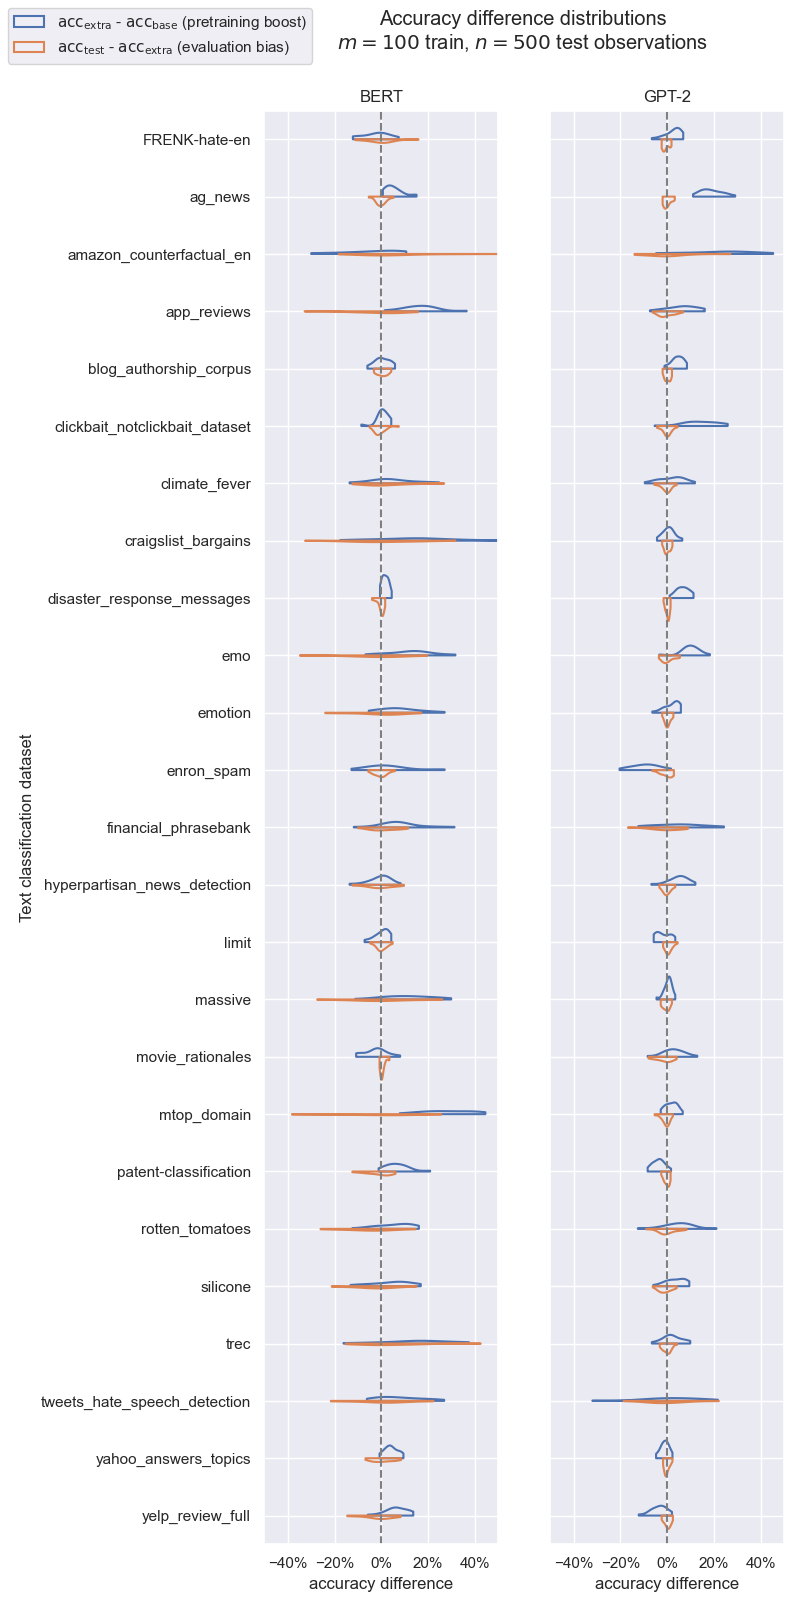

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.050082 ┆ 0.009035 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.211253 ┆ 0.046703 │
└──────────┴──────────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",0.00015,0.012179
"""ag_news""",0.12035,0.017956
"""amazon_counter…",0.09565,0.041538
"""app_reviews""",0.11375,0.019218
"""blog_authorshi…",0.0234,0.007934
…,…,…
"""silicone""",0.039,0.015265
"""trec""",0.09185,0.028421
"""tweets_hate_sp…",0.04965,0.025216
"""yahoo_answers_…",0.0152,0.008047


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",0.005007,0.02158
"""ag_news""",0.241968,0.045505
"""amazon_counter…",0.299053,0.122732
"""app_reviews""",0.875088,0.140743
"""blog_authorshi…",0.049259,0.015833
…,…,…
"""silicone""",0.081492,0.028335
"""trec""",0.462132,0.140411
"""tweets_hate_sp…",0.087765,0.041152
"""yahoo_answers_…",0.154844,0.074238


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 642 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:base],0.14616,0.13559,-0.06212,0.36077,0.00268,0.00192,2556.44589,2508.14326,1.00091
1|dataset:method[FRENK-hate-en:extra],-0.13379,0.13609,-0.34646,0.08021,0.00271,0.00210,2530.47910,2108.02789,0.99997
1|dataset:method[ag_news:base],-0.15224,0.13910,-0.37120,0.06152,0.00249,0.00180,3126.51565,2900.01518,1.00021
1|dataset:method[ag_news:extra],0.18213,0.13954,-0.03708,0.40139,0.00253,0.00200,3085.52827,2898.33094,1.00055
1|dataset:method[amazon_counterfactual_en:base],-0.08180,0.13550,-0.28282,0.15070,0.00259,0.00194,2746.33150,2695.69999,1.00237
1|dataset:method[amazon_counterfactual_en:extra],0.10982,0.13794,-0.11524,0.32656,0.00261,0.00209,2826.59871,2535.38567,1.00138
1|dataset:method[app_reviews:base],-0.24149,0.13479,-0.44816,-0.02692,0.00244,0.00182,3073.35828,2624.17855,1.00051
1|dataset:method[app_reviews:extra],0.20919,0.13469,-0.01297,0.40829,0.00242,0.00183,3107.90344,2531.66028,1.00016
1|dataset:method[blog_authorship_corpus:base],0.09573,0.13689,-0.12008,0.31304,0.00274,0.00201,2503.17295,2463.37693,1.00127
1|dataset:method[blog_authorship_corpus:extra],-0.09097,0.13586,-0.30219,0.12258,0.00270,0.00211,2536.77723,2474.79834,1.00098


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


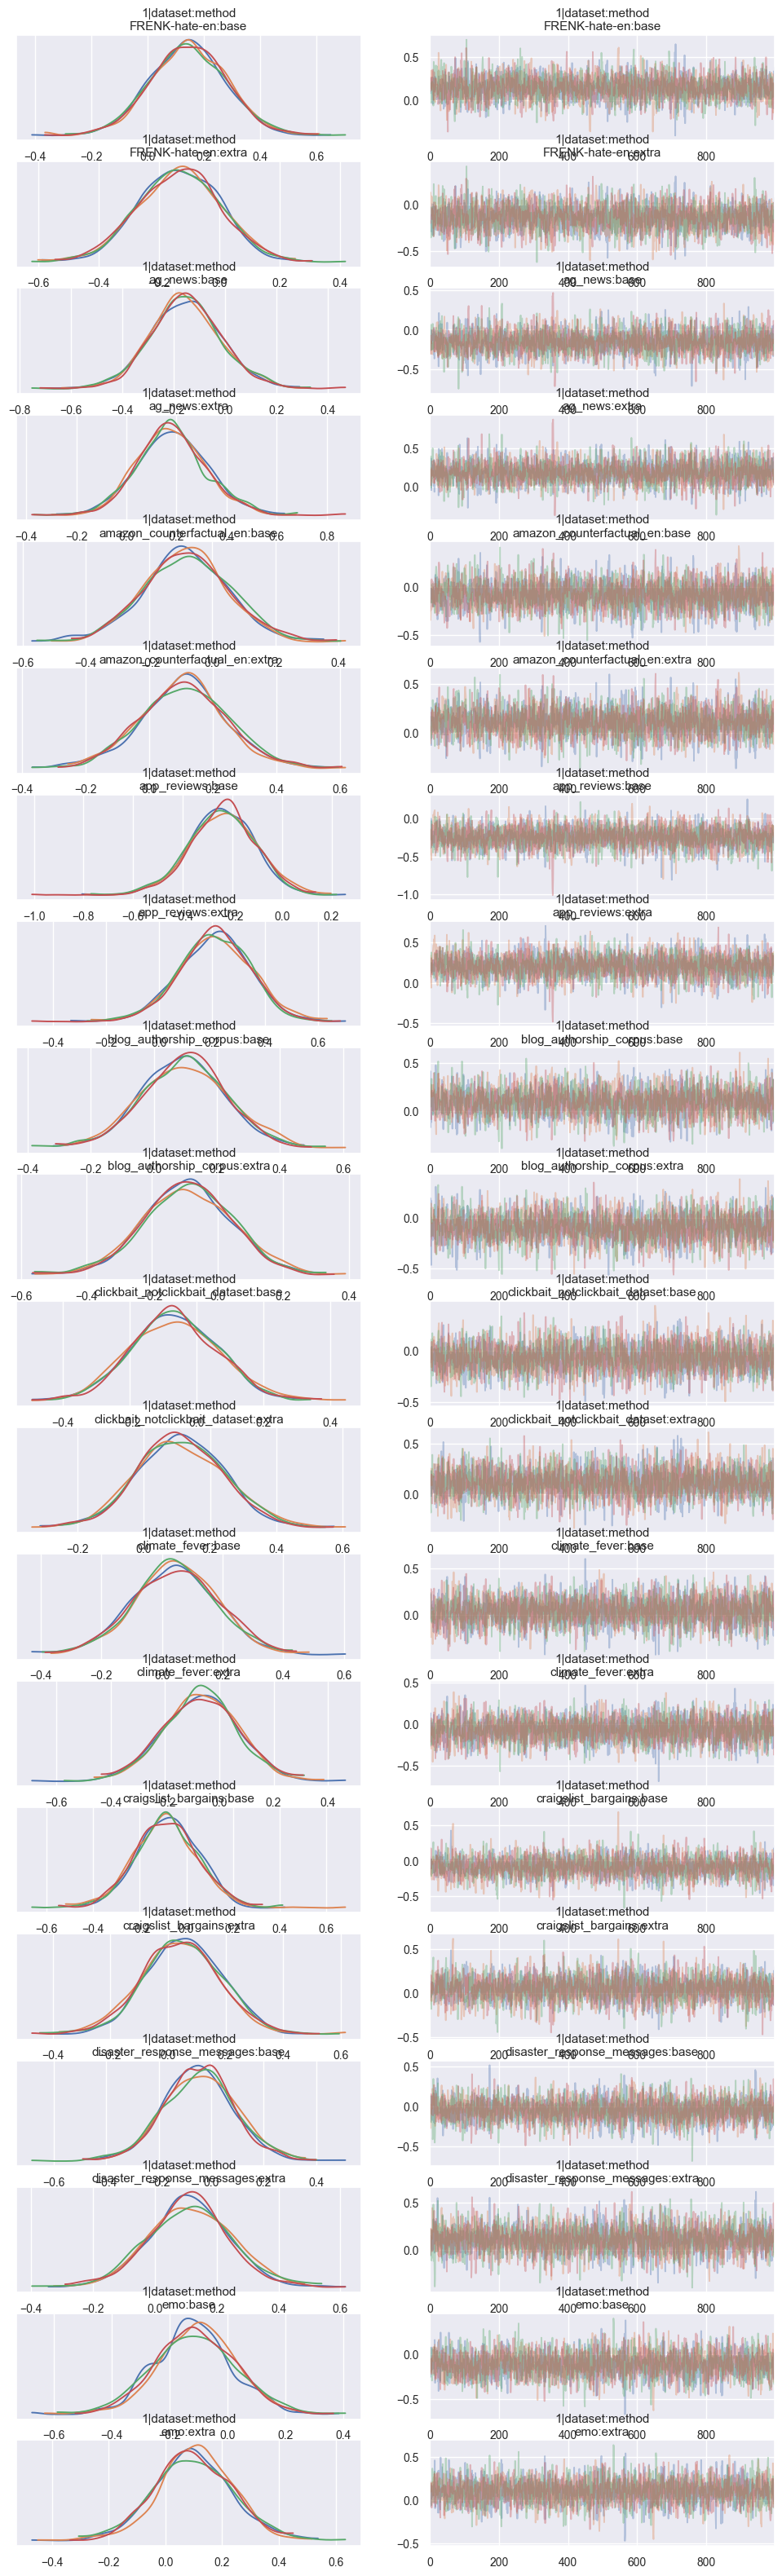

In [10]:
model_control, summary_control, az_summary_control = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_control)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 2000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────────┬──────────┐
│ mean      ┆ se       │
╞═══════════╪══════════╡
│ -0.001834 ┆ 0.002254 │
└───────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.021576 ┆ 0.011069 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",-0.00085,0.010208
"""ag_news""",-0.0003,0.004285
"""amazon_counter…",0.0263,0.030146
"""app_reviews""",-0.0036,0.018418
"""blog_authorshi…",0.0028,0.003893
…,…,…
"""silicone""",-0.02005,0.01511
"""trec""",0.01755,0.02139
"""tweets_hate_sp…",0.00255,0.02263
"""yahoo_answers_…",0.0028,0.0073


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",0.001534,0.019202
"""ag_news""",-0.000011,0.005613
"""amazon_counter…",0.080184,0.073573
"""app_reviews""",0.021547,0.063065
"""blog_authorshi…",0.005176,0.00735
…,…,…
"""silicone""",-0.027684,0.023877
"""trec""",0.084645,0.083192
"""tweets_hate_sp…",0.016488,0.035837
"""yahoo_answers_…",0.038946,0.05542


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 739 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:extra],-0.00297,0.02907,-0.04842,0.04347,0.00041,0.00043,5046.33599,3101.81084,1.00018
1|dataset:method[FRENK-hate-en:test],0.00177,0.02912,-0.04398,0.04836,0.00040,0.00042,5405.53310,3194.13314,1.00085
1|dataset:method[ag_news:extra],-0.00224,0.02895,-0.04504,0.04685,0.00039,0.00047,5380.88492,3001.04683,1.00026
1|dataset:method[ag_news:test],0.00344,0.02937,-0.04530,0.04785,0.00042,0.00045,4884.33936,2714.74002,0.99971
1|dataset:method[amazon_counterfactual_en:extra],-0.06173,0.03042,-0.10610,-0.01037,0.00041,0.00034,5339.40880,3067.12428,0.99966
1|dataset:method[amazon_counterfactual_en:test],0.06270,0.03079,0.01421,0.11162,0.00042,0.00035,5306.10113,2895.45039,1.00161
1|dataset:method[app_reviews:extra],0.00348,0.02922,-0.04129,0.05097,0.00037,0.00043,6367.41982,3222.39420,1.00048
1|dataset:method[app_reviews:test],-0.00572,0.02895,-0.05078,0.03929,0.00038,0.00044,5729.12685,3083.73768,1.00299
1|dataset:method[blog_authorship_corpus:extra],-0.00840,0.02895,-0.05588,0.03537,0.00040,0.00048,5333.58465,2761.35493,1.00211
1|dataset:method[blog_authorship_corpus:test],0.00917,0.02954,-0.03666,0.05608,0.00039,0.00046,5751.61370,2423.36906,1.00233


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


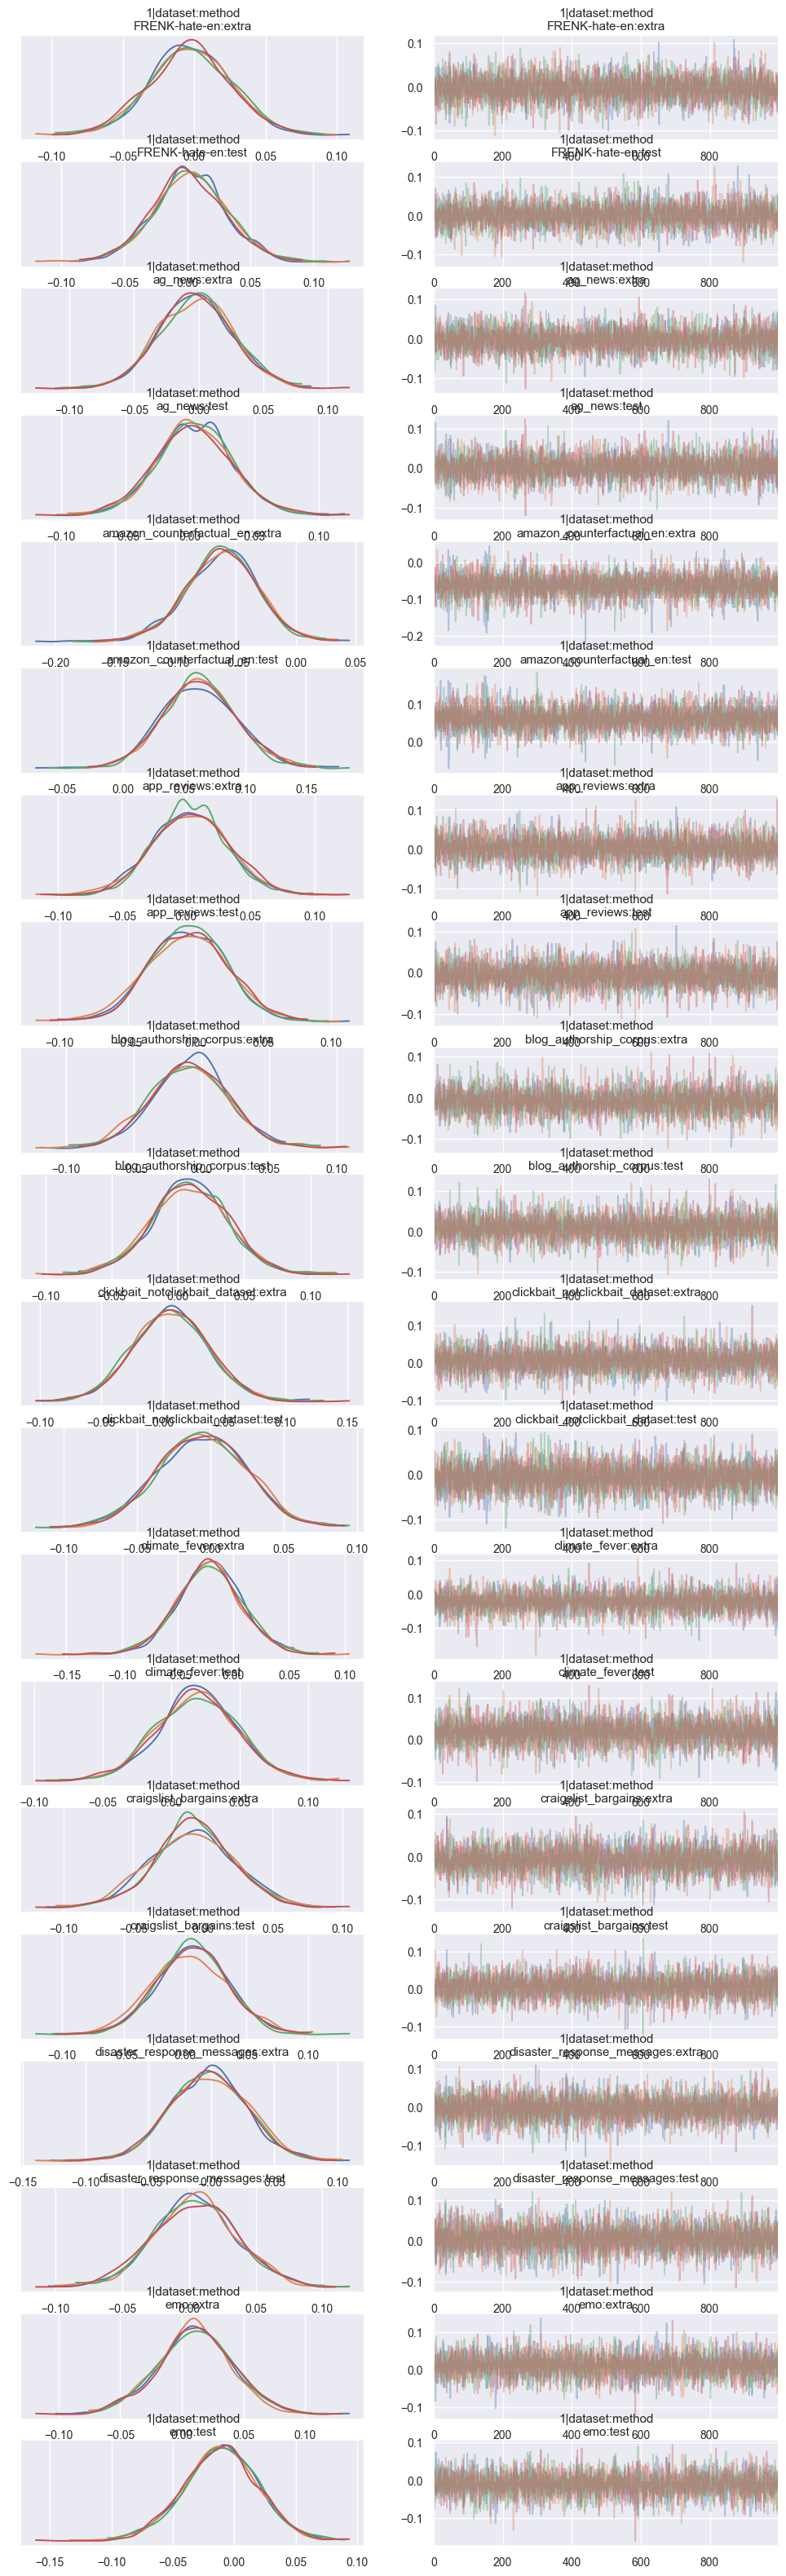

In [15]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 2000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.mkdir(netcdfs)

In [18]:
summary_control.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_control.nc")
)

'../../netcdfs/m100/main_m100_n500_control.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_treatment.nc")
)

'../../netcdfs/m100/main_m100_n500_treatment.nc'